In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv(r'C:\Users\welcomm\Documents\EDA for analysis\marketing_data.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
df.duplicated().sum()

0

In [5]:
df[' Income ']=df[' Income '].str.replace('$',"")
df[' Income ']=df[' Income '].str.replace(',',"").astype(float)
df[' Income ']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name:  Income , Length: 2240, dtype: float64

In [6]:
df.rename(columns={' Income ': 'Income'},inplace=True)

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [9]:
df['Marital_Status']=df['Marital_Status'].replace(['YOLO','Alone', 'Absurd'], 'Others')

In [10]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'Others'],
      dtype=object)

In [11]:
df[df['Marital_Status']=='Married']['Income'].isna().sum()

7

In [12]:
l=[]
for i in df['Marital_Status'].unique():
    x=df[df['Marital_Status']==i]
    y=x.fillna(x.Income.mean())
    l.append(y)
    print(i,'is mean',x.Income.mean())
    
df2=pd.concat(l)
df2.sort_index(axis=0,inplace=True)
df2.head()

Divorced is mean 52834.22844827586
Single is mean 50995.35031847134
Married is mean 51724.97899649942
Together is mean 53245.53403141361
Widow is mean 56481.55263157895
Others is mean 53280.28571428572


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [13]:
df2.Income.isnull().sum()

0

In [14]:
def age(x):
    import datetime
    today=datetime.date.today()
    year=today.strftime('%Y')
    y=int(year)-x
    return y

df2['Age']=df2['Year_Birth'].apply(age)

In [15]:
df2.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
575,4310,1944,Graduation,Married,80589.0,0,0,1/22/14,25,507,...,1,0,0,0,1,0,1,0,AUS,79
1477,9805,1953,Master,Together,56129.0,0,1,6/20/13,65,320,...,4,0,0,0,0,0,0,0,CA,70
1516,4597,1970,PhD,Together,82072.0,0,0,7/2/13,67,889,...,1,0,0,0,0,0,0,0,SA,53
280,979,1975,Graduation,Single,33249.0,1,0,2/20/13,11,6,...,6,0,0,0,0,0,0,0,SP,48
2188,1663,1978,PhD,Together,34043.0,1,0,10/25/13,97,20,...,9,0,0,0,0,0,0,0,SP,45


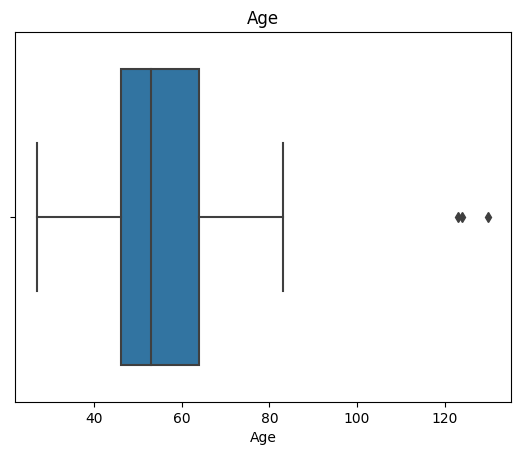

In [16]:
sns.boxplot(x=df2['Age'])
plt.title('Age')
plt.show()

In [17]:
x=df2[df2.Age>120]
x

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
513,11004,1893,2n Cycle,Single,60182.0,0,1,5/17/14,23,8,...,4,0,0,0,0,0,0,0,SA,130
827,1150,1899,PhD,Together,83532.0,0,0,9/26/13,36,755,...,1,0,0,1,0,0,0,0,SP,124
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/13,99,15,...,5,0,0,0,0,0,0,1,IND,123


In [18]:
df2.drop(index=x.index,axis=0,inplace=True)

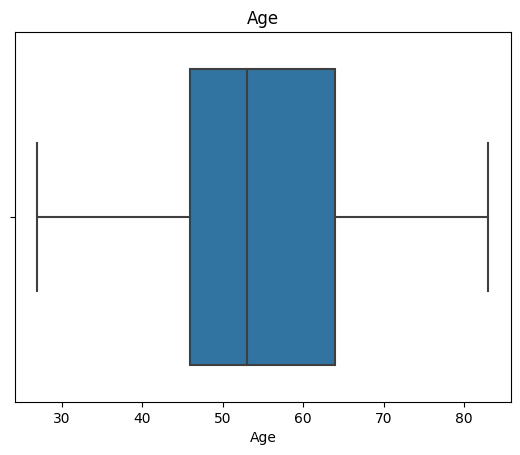

In [19]:
sns.boxplot(x=df2['Age'])
plt.title('Age')
plt.show()

In [20]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,1,0,0,0,0,0,1,0,SP,53
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,5,0,0,0,0,1,1,0,CA,62
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,0,0,0,0,0,0,0,US,65
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,7,0,0,0,0,0,0,0,AUS,56
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,7,1,0,0,0,0,1,0,SP,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,4,0,0,0,0,0,0,0,US,47
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,8,0,0,0,0,0,0,0,SP,46
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,8,0,0,0,0,0,0,0,SP,47
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,3,0,0,0,0,0,0,0,IND,45


In [21]:
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age'],
      dtype='object')

In [22]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
df2['Education']= label_encoder.fit_transform(df2['Education'])
df2['Marital_Status']= label_encoder.fit_transform(df2['Marital_Status'])
df2['Country']= label_encoder.fit_transform(df2['Country'])

In [23]:
df2.dtypes

ID                       int64
Year_Birth               int64
Education                int32
Marital_Status           int32
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                  int32
Age                      int64
dtype: object

In [24]:
df2.drop(columns=['ID','Dt_Customer'],inplace=True)

In [25]:
df2.corr()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
Year_Birth,1.000000,-0.184055,-0.044765,-0.162554,0.234133,-0.363350,-0.019670,-0.163035,-0.013751,-0.030927,...,0.117570,0.061013,-0.064341,0.015322,-0.008227,-0.007657,0.018424,-0.004479,0.019666,-1.000000
Education,-0.184055,1.000000,0.000477,0.119332,-0.044977,0.119420,-0.010695,0.195699,-0.083797,0.031264,...,-0.039917,0.005496,0.053041,0.030703,-0.011205,0.021275,0.090525,-0.041899,0.023338,0.184055
Marital_Status,-0.044765,0.000477,1.000000,0.019061,-0.014146,-0.019227,0.020907,0.003405,0.003381,0.034010,...,-0.035724,-0.020973,0.010697,0.011088,-0.014281,0.019813,0.006679,0.003614,0.016731,0.044765
Income,-0.162554,0.119332,0.019061,1.000000,-0.424995,0.019047,-0.003081,0.576726,0.428383,0.577820,...,-0.549711,-0.016039,0.182967,0.334241,0.275055,0.087635,0.133247,-0.024895,-0.003617,0.162554
Kidhome,0.234133,-0.044977,-0.014146,-0.424995,1.000000,-0.035753,0.007544,-0.496367,-0.372488,-0.437059,...,0.447641,0.014606,-0.161775,-0.204994,-0.172512,-0.081794,-0.080176,0.036283,-0.023867,-0.234133
Teenhome,-0.363350,0.119420,-0.019227,0.019047,-0.035753,1.000000,0.017115,0.005409,-0.175951,-0.260820,...,0.134491,-0.042823,0.038790,-0.190227,-0.140288,-0.015664,-0.154730,0.007591,-0.013663,0.363350
Recency,-0.019670,-0.010695,0.020907,-0.003081,0.007544,0.017115,1.000000,0.016668,-0.003592,0.023705,...,-0.021959,-0.032976,0.018890,0.000956,-0.019258,-0.001764,-0.198568,0.005398,0.035020,0.019670
MntWines,-0.163035,0.195699,0.003405,0.576726,-0.496367,0.005409,0.016668,1.000000,0.388518,0.561993,...,-0.320337,0.062201,0.373532,0.471969,0.354365,0.206040,0.247392,-0.035930,0.015018,0.163035
MntFruits,-0.013751,-0.083797,0.003381,0.428383,-0.372488,-0.175951,-0.003592,0.388518,1.000000,0.542057,...,-0.417427,0.014983,0.010402,0.212027,0.195380,-0.009701,0.125904,-0.002800,-0.004119,0.013751
MntMeatProducts,-0.030927,0.031264,0.034010,0.577820,-0.437059,-0.260820,0.023705,0.561993,0.542057,1.000000,...,-0.539203,0.018331,0.103053,0.372212,0.310096,0.043090,0.236640,-0.020720,0.007167,0.030927


In [26]:
df2.keys()

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age'],
      dtype='object')

1st campaign

In [27]:
x1=df2[['Income','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','NumCatalogPurchases','NumWebPurchases','NumStorePurchases', 'Complain','Country']]

In [28]:
y1=df2['AcceptedCmp1']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=1)

In [30]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_prediction = dtc.predict(x_test)
accuracy_score(dtc_prediction, y_test)

0.9077380952380952

In [31]:
svm_class = svm.SVC(kernel = 'rbf')
svm_class.fit(x_train, y_train)
svm_class_predict = svm_class.predict(x_test)
accuracy_score(svm_class_predict, y_test)

0.9270833333333334

In [32]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
accuracy_score(gnb_predict, y_test)

0.8020833333333334

The SVM model achieved the highest accuracy among the three models with an accuracy of 0.92. The Decision Tree model followed with an accuracy of 0.91, and the Gaussian Naive Bayes model had an accuracy of 0.80.

2nd campaign

In [33]:
x2=df2[['Income','Education','MntWines', 'MntWines',
       'MntMeatProducts', 'MntGoldProds','NumCatalogPurchases','NumWebPurchases','NumStorePurchases','AcceptedCmp1']]

In [34]:
y2=df2['AcceptedCmp2']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3,random_state=1)

In [36]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_prediction = dtc.predict(x_test)
accuracy_score(dtc_prediction, y_test)

0.9821428571428571

In [37]:
svm_class = svm.SVC(kernel = 'rbf')
svm_class.fit(x_train, y_train)
svm_class_predict = svm_class.predict(x_test)
accuracy_score(svm_class_predict, y_test)

0.9895833333333334

In [38]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
accuracy_score(gnb_predict, y_test)

0.9032738095238095

The SVM model achieved the highest accuracy among the three models with an accuracy of 0.99. The Decision Tree model followed with an accuracy of 0.98, and the Gaussian Naive Bayes model had an accuracy of 0.90.

3rd campaign

In [39]:
x3=df2[['Year_Birth','MntWines', 'MntFruits','MntMeatProducts', 
       'MntGoldProds','NumCatalogPurchases','NumWebPurchases','NumWebVisitsMonth',
        'AcceptedCmp1','AcceptedCmp2','Complain', 'Country','Response']]

In [40]:
y3=df2['AcceptedCmp3']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x3,y3,test_size=0.3,random_state=1)

In [42]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_prediction = dtc.predict(x_test)
accuracy_score(dtc_prediction, y_test)

0.8779761904761905

In [43]:
svm_class = svm.SVC(kernel = 'rbf')
svm_class.fit(x_train, y_train)
svm_class_predict = svm_class.predict(x_test)
accuracy_score(svm_class_predict, y_test)

0.9315476190476191

In [44]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
accuracy_score(gnb_predict, y_test)

0.7752976190476191

The SVM model achieved the highest accuracy among the three models with an accuracy of 0.93. The Decision Tree model followed with an accuracy of 0.87, and the Gaussian Naive Bayes model had an accuracy of 0.77.

4th campaign

In [45]:
x4=df2[['Education', 'Marital_Status', 'Income','Recency', 'Teenhome','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases',
       'AcceptedCmp1','AcceptedCmp2','Country']]

In [46]:
y4=df2['AcceptedCmp4']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x4,y4,test_size=0.3,random_state=1)

In [48]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_prediction = dtc.predict(x_test)
accuracy_score(dtc_prediction, y_test)

0.9122023809523809

In [49]:
svm_class = svm.SVC(kernel = 'rbf')
svm_class.fit(x_train, y_train)
svm_class_predict = svm_class.predict(x_test)
accuracy_score(svm_class_predict, y_test)

0.9345238095238095

In [50]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
accuracy_score(gnb_predict, y_test)

0.8065476190476191

The SVM model achieved the highest accuracy among the three models with an accuracy of 0.93. The Decision Tree model followed with an accuracy of 0.92, and the Gaussian Naive Bayes model had an accuracy of 0.80.

5th campaign

In [51]:
x5=df2[['Year_Birth','Education', 'Marital_Status', 'Income','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases',
       'NumCatalogPurchases','NumStorePurchases',
       'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','Country']]

In [52]:
y5=df2['AcceptedCmp5']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x5,y5,test_size=0.3,random_state=1)

In [54]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_prediction = dtc.predict(x_test)
accuracy_score(dtc_prediction, y_test)

0.9330357142857143

In [55]:
svm_class = svm.SVC(kernel = 'rbf')
svm_class.fit(x_train, y_train)
svm_class_predict = svm_class.predict(x_test)
accuracy_score(svm_class_predict, y_test)

0.9211309523809523

In [56]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
accuracy_score(gnb_predict, y_test)

0.8377976190476191

The Decision Tree model achieved the highest accuracy among the three models with an accuracy of 0.93. The SVM model followed with an accuracy of 0.92, and the Gaussian Naive Bayes model had an accuracy of 0.83.

last campaign

In [57]:
df2.corr().Response

Year_Birth             0.018424
Education              0.090525
Marital_Status         0.006679
Income                 0.133247
Kidhome               -0.080176
Teenhome              -0.154730
Recency               -0.198568
MntWines               0.247392
MntFruits              0.125904
MntMeatProducts        0.236640
MntFishProducts        0.111415
MntSweetProducts       0.117366
MntGoldProds           0.140693
NumDealsPurchases      0.001854
NumWebPurchases        0.148453
NumCatalogPurchases    0.220894
NumStorePurchases      0.038855
NumWebVisitsMonth     -0.004449
AcceptedCmp3           0.254144
AcceptedCmp4           0.176890
AcceptedCmp5           0.328182
AcceptedCmp1           0.293882
AcceptedCmp2           0.169249
Response               1.000000
Complain               0.000185
Country                0.021498
Age                   -0.018424
Name: Response, dtype: float64

In [58]:
x6=df2[['Income','Year_Birth','Marital_Status','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4',
       'AcceptedCmp5']]

In [59]:
y6=df2['Response']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x6,y6,test_size=0.3,random_state=1)

In [61]:
x_train.shape

(1565, 18)

In [62]:
x_test.shape

(672, 18)

In [63]:
y_train.shape

(1565,)

In [64]:
y_test.shape

(672,)

#### Decision Tree Classifier

In [65]:
dtc=DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [66]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [67]:
dtc_prediction = dtc.predict(x_test)

In [68]:
accuracy_score(dtc_prediction, y_test)

0.8303571428571429

#### Support Vector Machine

In [69]:
svm_class = svm.SVC(kernel = 'rbf')
svm_class

SVC()

In [70]:
svm_class.fit(x_train,y_train)

SVC()

In [71]:
svm_class_predict = svm_class.predict(x_test)

In [72]:
accuracy_score(svm_class_predict, y_test)

0.8318452380952381

#### Gaussian Naive Bayes classifier

In [73]:
gnb = GaussianNB()
gnb

GaussianNB()

In [74]:
gnb.fit(x_train, y_train)

GaussianNB()

In [75]:
gnb_predict_gg = gnb.predict(x_test)

In [76]:
accuracy_score(y_test, gnb_predict_gg)

0.7485119047619048

## ML model Report

#### Dataset Description
The dataset contains information about customers, including their demographic details, purchase history, and response to marketing campaigns. The target variable is 'Response', which indicates whether the customer responded to the marketing campaign (1) or not (0).

#### Data Preprocessing
- Unnecessary columns 'ID' and 'Dt_Customer' were dropped from the dataset.
- Categorical variables 'Education', 'Marital_Status', and 'Country' were converted to numerical using one-hot encoding.
- The dataset was split into training and testing sets with an 70-30 ratio.

#### Model Training and Evaluation
SVM (Support Vector Machine) Model
- Model Parameters: Rbf kernel
- Accuracy: 0.8318452380952381

Decision Tree Model
- Model Parameters: Default settings 
- Accuracy: 0.8139880952380952

Gaussian Naive Bayes Model
- Model Parameters: Default settings
- Accuracy: 0.7485119047619048

#### Model Comparison
The SVM model achieved the highest accuracy among the three models with an accuracy of 0.83. The Decision Tree model followed with an accuracy of 0.81, and the Gaussian Naive Bayes model had an accuracy of 0.74.

#### Conclusion:
Based on the accuracy scores provided, the Support Vector Machine (SVM) classifier gives the best fit model for the Marketing dataset.It achieved an accuracy score of 83%, which is the highest among the three models. This suggests that the SVM model is better suited for predicting customer response to marketing campaigns in this dataset.

While Support Vector Machine (SVM) showed the highest accuracy, it is essential to consider other performance metrics and perform cross-validation to ensure the robustness of the results. Additionally, feature importance analysis could provide insights into which features influence the predictions the most.

#### SVM might achieve higher accuracy compared to other classifiers, here are some potential reasons:
SVM works well in high-dimensional spaces and is effective when the number of features is greater than the number of samples. In this dataset, it is more features than customers, SVM might handle this situation better than other classifiers.

SVM can handle non-linear decision boundaries through the use of kernel functions. This allows SVM to capture complex relationships between features and the target variable.

SVM is less prone to overfitting, especially when using a proper regularization parameter (C). It generalizes well to unseen data.

SVM is robust against outliers since it focuses on the support vectors near the decision boundary.